In [6]:
import keras

In [7]:
import matplotlib.pyplot as plt

In [8]:
keras.backend.backend()

'tensorflow'

In [9]:
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

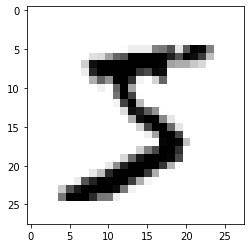

In [15]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [20]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.2368 - accuracy: 0.9304
Epoch 2/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.0991 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.0676 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.0527 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.0413 - accuracy: 0.9865


In [24]:
model.save("fashion.model")

INFO:tensorflow:Assets written to: fashion.model\assets


In [25]:
_model = keras.models.load_model("fashion.model")

In [26]:
_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 670us/step - loss: 0.0811 - accuracy: 0.9768


[0.08114461600780487, 0.9768000245094299]

In [27]:
predictions = _model.predict([x_test])

In [28]:
predictions[0]

array([7.7075599e-09, 4.0592479e-07, 6.6351947e-07, 8.3266947e-05,
       2.2505506e-11, 2.1070452e-09, 9.8738361e-12, 9.9991453e-01,
       7.4360663e-08, 1.0521912e-06], dtype=float32)

In [29]:
import numpy as np

In [30]:
np.argmax(predictions[37])

1

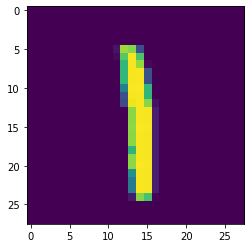

In [32]:
plt.imshow(x_test[37])